<a href="https://colab.research.google.com/github/malibayram/50projects50days/blob/master/svm_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine


In [ ]:
!pip3 install -U ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
wine = datasets.load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
df['target'].unique()

array([0, 1, 2])

In [ ]:
df['target'].value_counts()

,count
target,
1,71
0,59
2,48


In [ ]:
x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train[:5], y_train[:5]

(     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 158    14.34        1.68  2.70               25.0       98.0           2.80   
 137    12.53        5.51  2.64               25.0       96.0           1.79   
 98     12.37        1.07  2.10               18.5       88.0           3.52   
 159    13.48        1.67  2.64               22.5       89.0           2.60   
 38     13.07        1.50  2.10               15.5       98.0           2.40   
 
      flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
 158        1.31                  0.53             2.70            13.00  0.57   
 137        0.60                  0.63             1.10             5.00  0.82   
 98         3.75                  0.24             1.95             4.50  1.04   
 159        1.10                  0.52             2.29            11.75  0.57   
 38         2.64                  0.28             1.37             3.70  1.18   
 
      od280/od315_of_dil

In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test =  scaler.transform(x_test)

x_train[:5]

array([[ 1.66529275, -0.60840587,  1.21896194,  1.60540017, -0.16738426,
         0.80400157, -0.6916784 ,  1.26722552,  1.8775398 ,  3.41947305,
        -1.65632857, -0.87940904, -0.24860607],
       [-0.54952506,  2.7515415 ,  1.00331502,  1.60540017, -0.30437887,
        -0.78538376, -1.40123291,  2.04959953, -0.87350523, -0.0248012 ,
        -0.58463272, -1.25462095, -0.72992237],
       [-0.74531007, -1.14354109, -0.93750727, -0.28270426, -0.8523573 ,
         1.93702874,  1.7467906 , -1.00165913,  0.58798744, -0.24006834,
         0.35845962,  0.2462267 , -0.24860607],
       [ 0.61294837, -0.61717858,  1.00331502,  0.87920616, -0.78385999,
         0.4892718 , -0.90154664,  1.18898812,  1.17258451,  2.8813052 ,
        -1.65632857, -1.12955031, -0.38138298],
       [ 0.11124931, -0.76631462, -0.93750727, -1.15413707, -0.16738426,
         0.17454204,  0.63748708, -0.68870952, -0.40926638, -0.58449577,
         0.95860929,  0.1350528 ,  0.94638614]])

In [ ]:
x_tum =  scaler.fit_transform(x)

svm_model2 = SVC(kernel='linear', random_state=42)
svm_model2.fit(x_tum, y)
y_pred = svm_model2.predict(x_tum)
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy* 100:.2f}%')
print(classification_report(y, y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy* 100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 97.22%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [ ]:
x_vis = df.iloc[:, [0,1]].values
y_vis = df['target'].values


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_vis = le.fit_transform(y_vis)

In [ ]:
x_train_vis, x_test_vis, y_train_vis, y_test_vis = train_test_split(x_vis, y_vis, test_size=0.2, random_state=42)


In [ ]:
x_train_vis = scaler.fit_transform(x_train_vis)
x_test_vis = scaler.transform(x_test_vis)


In [ ]:
svm_model_vis = SVC(kernel= 'linear', random_state=42)
svm_model_vis.fit(x_train_vis, y_train_vis)


SVC(kernel='linear', random_state=42)

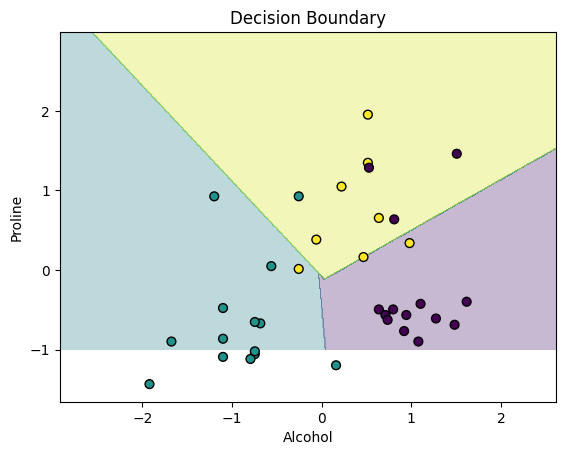

In [ ]:
def plot_decision_boundary(x, y, model):
  x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx,yy = np.meshgrid(np.arange(x_min, x_max,0.01),
                      np.arange(y_min, y_max,0.01))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.3)
  plt.scatter(x[:,0],x[:,1], c=y, s=40, edgecolor='k')
  plt.xlabel('Alcohol')
  plt.ylabel('Proline')
  plt.title('Decision Boundary')
  plt.show()

plot_decision_boundary(x_test_vis,y_test_vis,svm_model_vis)


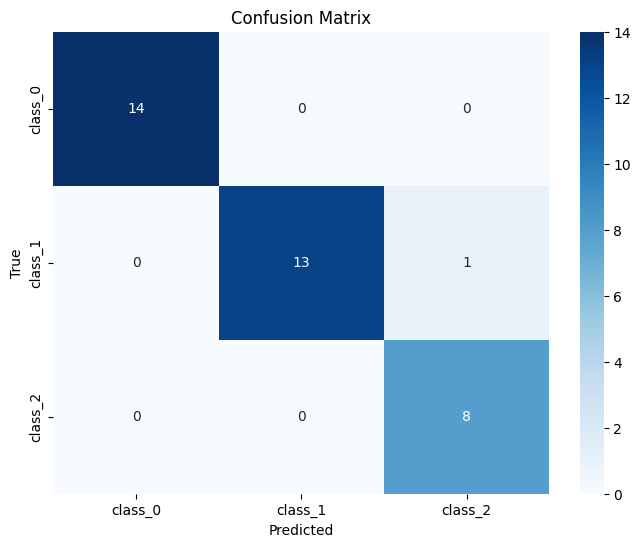

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_vis, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names,yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()